<a href="https://colab.research.google.com/github/prateeksingh2001/FDS_Labwork/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data= pd.read_csv('/content/1. Simple linear regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:
data['SAT'].mean()

1845.2738095238096

In [ ]:
data['GPA'].mean()

3.330238095238095

In [ ]:
x = data['SAT'].values
y = data['GPA'].values

x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate beta1 (slope)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
beta1 = numerator / denominator

# Calculate beta0 (intercept)
beta0 = y_mean - (beta1 * x_mean)

print(f"Beta0 (Intercept): {beta0}")
print(f"Beta1 (Slope): {beta1}")

Beta0 (Intercept): 0.2750402996602803
Beta1 (Slope): 0.001655688050092814


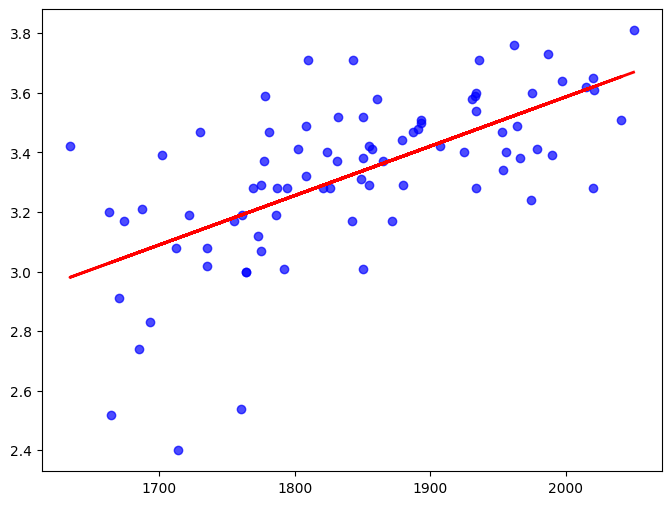

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data Points', color='blue', alpha=0.7)

plt.plot(x, beta0 + beta1 * x, color='red', linewidth=2, label='Regression Line')

In [ ]:
y_new = beta1 * x + beta0
y_new


array([3.11288962, 3.03010522, 3.18905127, 3.06487466, 3.07812017,
       3.04003934, 3.19567402, 3.19567402, 3.24203329, 3.33806319,
       3.14765907, 3.21388659, 3.14765907, 3.10957824, 3.21057521,
       3.37448833, 3.18077283, 3.0466621 , 3.32481769, 3.23209916,
       3.19070696, 3.12613512, 3.02844953, 3.06818604, 3.54336851,
       3.29832668, 3.23375485, 3.29004824, 3.61953016, 3.24534466,
       3.20395246, 3.47714099, 3.21388659, 3.34634163, 3.38773383,
       3.3364075 , 3.26852429, 3.51025475, 3.21719796, 3.30660512,
       3.36289851, 3.33806319, 3.53012301, 3.09302136, 3.56985952,
       3.4622398 , 3.2950153 , 3.51356613, 3.34965301, 3.55164695,
       3.25859017, 3.34634163, 3.43243741, 2.98043457, 3.38607815,
       3.39932365, 3.13938063, 3.50859906, 3.22382072, 3.4059464 ,
       3.52681163, 3.26852429, 3.40925778, 3.65429961, 3.40925778,
       3.30826081, 3.33806319, 3.47714099, 3.35627576, 3.47217392,
       3.4754853 , 3.21885365, 3.5450242 , 3.47714099, 3.62118

In [ ]:
data['GPA'].head()

,GPA
0,2.40
1,2.52
2,2.54
3,2.74
4,2.83


My hypothesis is that beta 1 is 0

In [ ]:
# Calculate residuals
residuals = data['GPA'] - y_new
residuals

,GPA
0,-0.712890
1,-0.510105
2,-0.649051
3,-0.324875
4,-0.248120
...,...
79,0.229548
80,0.438164
81,0.165108
82,0.236500


In [ ]:
squared_residuals = residuals**2
sum_squared_residuals = np.sum(squared_residuals)
sum_squared_residuals

3.6372727995805025

In [ ]:
# Calculate standard error of beta1
standard_error_beta1 = sum_squared_residuals/ np.sqrt(np.sum((x - x_mean)**2))

standard_error_beta1

0.003819382311854955

In [ ]:
# Calculate t-statistic
t_value = beta1 / standard_error_beta1

print(f"t-statistic: {t_value}")

t-statistic: 0.4334962868089259


T value from table is 1.98 for dof 84-2(n-k)

In [ ]:
from scipy import stats

# Calculate p-value (two-tailed test)
p_value = 2 * stats.t.sf(abs(t_value), df=len(x) - 2)

print(f"p-value: {p_value}")

p-value: 0.6657925426527822


In [ ]:
import random
y_1 = 2 * data['SAT'] + 3 + np.random.random()
y_1

,SAT
0,3431.507047
1,3331.507047
2,3523.507047
3,3373.507047
4,3389.507047
...,...
79,3875.507047
80,3623.507047
81,3977.507047
82,3927.507047


In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y_1)

# Calculate beta1 (slope)
numerator = np.sum((x - x_mean) * (y_1 - y_mean))
denominator = np.sum((x - x_mean)**2)
beta1 = numerator / denominator

# Calculate beta0 (intercept)
beta0 = y_mean - (beta1 * x_mean)

print(f"Beta0 (Intercept): {beta0}")
print(f"Beta1 (Slope): {beta1}")

Beta0 (Intercept): 3.507046795232327
Beta1 (Slope): 1.9999999999999998


In [ ]:
x_new = np.arange(1, 11)
x_new

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
y_2= x_new**2
y_2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [ ]:
x_mean = np.mean(x_new)
print(x_mean)
y_mean = np.mean(y_2)
print(y_mean)

5.5
38.5


In [ ]:
# Calculate beta1 (slope)
numerator = np.sum((x_new - x_mean) * (y_2 - y_mean))
print(numerator)
denominator = np.sum((x - x_mean)**2)
print(denominator)
beta1 = numerator / denominator

# Calculate beta0 (intercept)
beta0 = y_mean - (beta1 * x_mean)

print(f"Beta0 (Intercept): {beta0}")
print(f"Beta1 (Slope): {beta1}")

907.5
285227397.0
Beta0 (Intercept): 38.499982500804435
Beta1 (Slope): 3.1816719205273256e-06


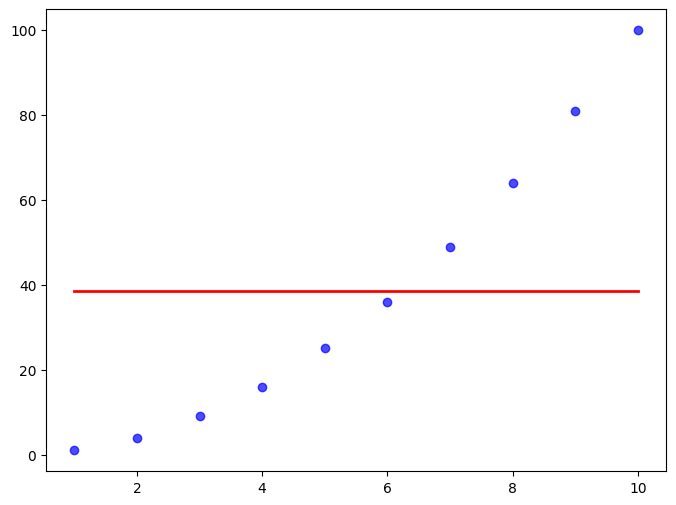

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_new, y_2, label='Data Points', color='blue', alpha=0.7)

plt.plot(x_new, beta0 + beta1 * x_new, color='red', linewidth=2, label='Regression Line')

we did wrong interpretation for data because when we use equation y=x^2 the value for y is wrong.
since data was non linear and we did linear regression that resulted in the such big issue.
To get the line with less error use multi-linear

In [ ]:
y_2new= beta1 * x_new + beta0
y_2new


array([38.49998568, 38.49998886, 38.49999205, 38.49999523, 38.49999841,
       38.50000159, 38.50000477, 38.50000795, 38.50001114, 38.50001432])